In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import sys
import os

import Binary_reader

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from scipy.linalg import svd
from sklearn.linear_model import SGDRegressor, LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Read in Data as a Pandas Dataframe

In [2]:
folder_path = "/home/torps/CommSense/Datadump/Testing/Wheelchair_Testing/6/Bin/"
complete_data, original_data = Binary_reader.get_pandas_dataFrame(folder_path)
complete_data

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,Target
0,1.215409+2.766321j,1.186069+2.754156j,1.158161+2.744273j,1.134166+2.738373j,1.116569+2.738155j,1.106628+2.743836j,1.102874+2.753804j,1.103694+2.767020j,1.107479+2.782448j,1.112615+2.799049j,...,-1.511481+3.495061j,-1.499791+3.516908j,-1.499161+3.539608j,-1.508492+3.565354j,-1.522183+3.591754j,-1.534633+3.616414j,-1.540241+3.636940j,-1.533406+3.650940j,-1.512975+3.657552j,0
1,1.262803+2.772492j,1.232981+2.760217j,1.204227+2.750190j,1.178911+2.744361j,1.155970+2.744691j,1.137300+2.750315j,1.130065+2.759125j,1.129185+2.770673j,1.131862+2.784147j,1.137059+2.797892j,...,-1.465360+3.483270j,-1.455674+3.507387j,-1.458114+3.529789j,-1.466437+3.552451j,-1.477976+3.576162j,-1.487407+3.598123j,-1.486838+3.615508j,-1.467093+3.625029j,-1.440289+3.628769j,0
2,1.311866+2.777094j,1.283921+2.765768j,1.255450+2.756542j,1.228176+2.752357j,1.198960+2.753458j,1.172950+2.758041j,1.157452+2.766260j,1.153438+2.776318j,1.155591+2.787051j,1.162588+2.797173j,...,-1.422600+3.471328j,-1.420042+3.497081j,-1.423499+3.522270j,-1.430702+3.541486j,-1.438776+3.561068j,-1.440931+3.578859j,-1.424934+3.590349j,-1.395614+3.594739j,-1.361547+3.595804j,0
3,1.356820+2.779256j,1.333368+2.770294j,1.306877+2.763334j,1.276667+2.761438j,1.244877+2.762587j,1.215839+2.765929j,1.194195+2.771483j,1.185491+2.779621j,1.186636+2.787191j,1.191176+2.798910j,...,-1.385131+3.463696j,-1.386270+3.487601j,-1.388860+3.512052j,-1.390303+3.532400j,-1.391387+3.546327j,-1.381295+3.557737j,-1.354944+3.561994j,-1.320463+3.562444j,-1.282264+3.561204j,0
4,1.399102+2.780598j,1.379009+2.773580j,1.353820+2.769095j,1.323584+2.767227j,1.292149+2.767618j,1.263363+2.769910j,1.241076+2.773744j,1.229136+2.778764j,1.226576+2.785928j,1.228879+2.795478j,...,-1.337449+3.463140j,-1.338551+3.482789j,-1.340067+3.503235j,-1.338481+3.520818j,-1.330279+3.531875j,-1.311210+3.536034j,-1.281691+3.536238j,-1.245204+3.533805j,-1.205233+3.530055j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,-2.611432+2.065119j,-2.571430+2.017389j,-2.527291+1.976823j,-2.474642+1.955693j,-2.417118+1.953466j,-2.355767+1.964180j,-2.290738+1.989664j,-2.218628+2.026838j,-2.139703+2.070227j,-2.053335+2.112793j,...,2.380757-3.341258j,2.301425-3.418298j,2.230994-3.486389j,2.171481-3.543020j,2.123460-3.590744j,2.081494-3.635501j,2.040783-3.684684j,2.006018-3.734370j,1.974271-3.782342j,1
4854,-2.643848+2.052083j,-2.599840+2.016697j,-2.549594+1.989061j,-2.493337+1.979639j,-2.432570+1.981293j,-2.367371+1.991639j,-2.298225+2.011159j,-2.224511+2.043077j,-2.142522+2.078672j,-2.054276+2.117723j,...,2.380496-3.332270j,2.302894-3.407527j,2.232058-3.477679j,2.168448-3.541793j,2.115048-3.596350j,2.067523-3.650084j,2.026661-3.705276j,1.992637-3.758779j,1.962243-3.810163j,1
4855,-2.671688+2.045516j,-2.623860+2.019813j,-2.569562+2.005881j,-2.510219+2.001255j,-2.446069+2.005144j,-2.377349+2.016757j,-2.304296+2.035305j,-2.227148+2.059997j,-2.144252+2.090498j,-2.054826+2.127094j,...,2.381727-3.324976j,2.304000-3.400025j,2.232553-3.470843j,2.167133-3.537736j,2.107483-3.601009j,2.056392-3.661798j,2.014884-3.720867j,1.980052-3.777971j,1.948989-3.832863j,1
4856,-2.698661+2.040484j,-2.642202+2.031311j,-2.580589+2.031023j,-2.515544+2.034311j,-2.447931+2.040796j,-2.376589+2.052876j,-2.302887+2.066562j,-2.223490+2.082705j,-2.134273+2.109379j,-2.039865+2.144498j,...,2.395136-3.311747j,2.317467-3.385440j,2.244396-3.456677j,2.173040-3.528813j,2.105416-3.597290j,2.048475-3.655506j,2.002932-3.712935j,1.963736-3.774034j,1.928495-3.834895j,1


In [21]:
complex_columns = []

for i in range(14):
    real_part = original_data.iloc[:,i]
    imag_part = original_data.iloc[:, i+14]
    complex_col = real_part+1j*imag_part
    complex_columns.append(complex_col)

complex_df = pd.concat(complex_columns, axis=1)
complex_df.columns = [i for i in range(14)]


chunk_size = 600

df_chunks = [complex_df.iloc[i:i + chunk_size].reset_index(drop=True) for i in range(0, len(complex_df),chunk_size)]

step = 600
targets_start = original_data['Target'].iloc[::step].reset_index(drop=True)
expanded_targets = targets_start.apply(lambda x: [x] * 600)

expanded_targets

for i in range(len(df_chunks)):
    df_chunks[i]['Target'] = expanded_targets[i]

# df_chunks[0]
total_chunks = pd.concat(df_chunks, ignore_index=True)
total_chunks

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Target
0,1.215409+2.766321j,1.262803+2.772492j,1.311866+2.777094j,1.356820+2.779256j,1.399102+2.780598j,1.438761+2.784352j,1.474518+2.788465j,1.508946+2.791132j,1.549361+2.795309j,1.589798+2.801519j,1.628972+2.805934j,1.667370+2.808076j,1.705689+2.809877j,1.743480+2.808153j,0
1,1.186069+2.754156j,1.232981+2.760217j,1.283921+2.765768j,1.333368+2.770294j,1.379009+2.773580j,1.419334+2.776429j,1.454580+2.779485j,1.489474+2.780848j,1.530058+2.783678j,1.570805+2.789216j,1.610679+2.793516j,1.649245+2.794924j,1.686945+2.793175j,1.724428+2.789030j,0
2,1.158161+2.744273j,1.204227+2.750190j,1.255450+2.756542j,1.306877+2.763334j,1.353820+2.769095j,1.398460+2.769983j,1.435317+2.771129j,1.471190+2.770981j,1.511876+2.772207j,1.552634+2.775933j,1.592574+2.778405j,1.628913+2.777567j,1.667705+2.774476j,1.704883+2.768705j,0
3,1.134166+2.738373j,1.178911+2.744361j,1.228176+2.752357j,1.276667+2.761438j,1.323584+2.767227j,1.373471+2.766218j,1.417581+2.764272j,1.455285+2.761950j,1.496142+2.761002j,1.536286+2.761071j,1.572755+2.759813j,1.606176+2.756233j,1.645229+2.752202j,1.684591+2.747155j,0
4,1.116569+2.738155j,1.155970+2.744691j,1.198960+2.753458j,1.244877+2.762587j,1.292149+2.767618j,1.345468+2.764811j,1.397933+2.759896j,1.442947+2.754172j,1.482262+2.748663j,1.518596+2.743900j,1.552075+2.739213j,1.583006+2.733009j,1.620730+2.727509j,1.661735+2.723359j,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183595,2.268521-3.239627j,2.240453-3.289295j,2.210048-3.340679j,2.182960-3.390587j,2.161557-3.437681j,2.149623-3.482573j,2.148233-3.525847j,2.145885-3.562670j,2.133287-3.581587j,2.123460-3.590744j,2.115048-3.596350j,2.107483-3.601009j,2.105416-3.597290j,2.111804-3.579342j,1
183596,2.205246-3.279188j,2.178054-3.329793j,2.148553-3.382712j,2.122232-3.435168j,2.104035-3.483229j,2.099725-3.525400j,2.103570-3.563603j,2.104701-3.599893j,2.093301-3.621005j,2.081494-3.635501j,2.067523-3.650084j,2.056392-3.661798j,2.048475-3.655506j,2.046077-3.644388j,1
183597,2.147870-3.316831j,2.122225-3.368224j,2.096948-3.421434j,2.077906-3.472283j,2.062756-3.519941j,2.060913-3.564271j,2.065157-3.601576j,2.066546-3.635911j,2.055551-3.660923j,2.040783-3.684684j,2.026661-3.705276j,2.014884-3.720867j,2.002932-3.712935j,1.988167-3.706081j,1
183598,2.095016-3.354594j,2.076036-3.404109j,2.059735-3.453851j,2.045581-3.503216j,2.032307-3.550761j,2.030702-3.596622j,2.032534-3.638635j,2.027915-3.674690j,2.018074-3.706145j,2.006018-3.734370j,1.992637-3.758779j,1.980052-3.777971j,1.963736-3.774034j,1.939567-3.769504j,1


### Split the dataframe into a training and temp set. 

In [22]:
train_data, temp_test_data = train_test_split(complete_data, test_size=0.4, random_state=0)

# Creates a dataframe of possible label options

In [23]:

target1 = "Without Object"
target2 = "With Object"
target3 = "NA"
target4 = "NA"

# Separating out the target
y = complete_data.loc[:, ['Target']].values
y_labels = np.where(y == 0, target1, np.where(y==1, target2, np.where(y==2, target3, target4)))


lab = pd.DataFrame(y_labels,columns=['Target'])


### Define a seperate data variable equal to complete data.

In [24]:
# data = normalize(complete_data)
data = complete_data

data.pop

<bound method DataFrame.pop of                        0                   1                   2  \
0     1.215409+2.766321j  1.186069+2.754156j  1.158161+2.744273j   
1     1.262803+2.772492j  1.232981+2.760217j  1.204227+2.750190j   
2     1.311866+2.777094j  1.283921+2.765768j  1.255450+2.756542j   
3     1.356820+2.779256j  1.333368+2.770294j  1.306877+2.763334j   
4     1.399102+2.780598j  1.379009+2.773580j  1.353820+2.769095j   
...                  ...                 ...                 ...   
4279 -2.611432+2.065119j -2.571430+2.017389j -2.527291+1.976823j   
4280 -2.643848+2.052083j -2.599840+2.016697j -2.549594+1.989061j   
4281 -2.671688+2.045516j -2.623860+2.019813j -2.569562+2.005881j   
4282 -2.698661+2.040484j -2.642202+2.031311j -2.580589+2.031023j   
4283 -2.717242+2.052106j -2.655138+2.054517j -2.589526+2.061743j   

                       3                   4                   5  \
0     1.134166+2.738373j  1.116569+2.738155j  1.106628+2.743836j   
1     1.178911+2

# Displays the channel estimation from a single LTE frame 

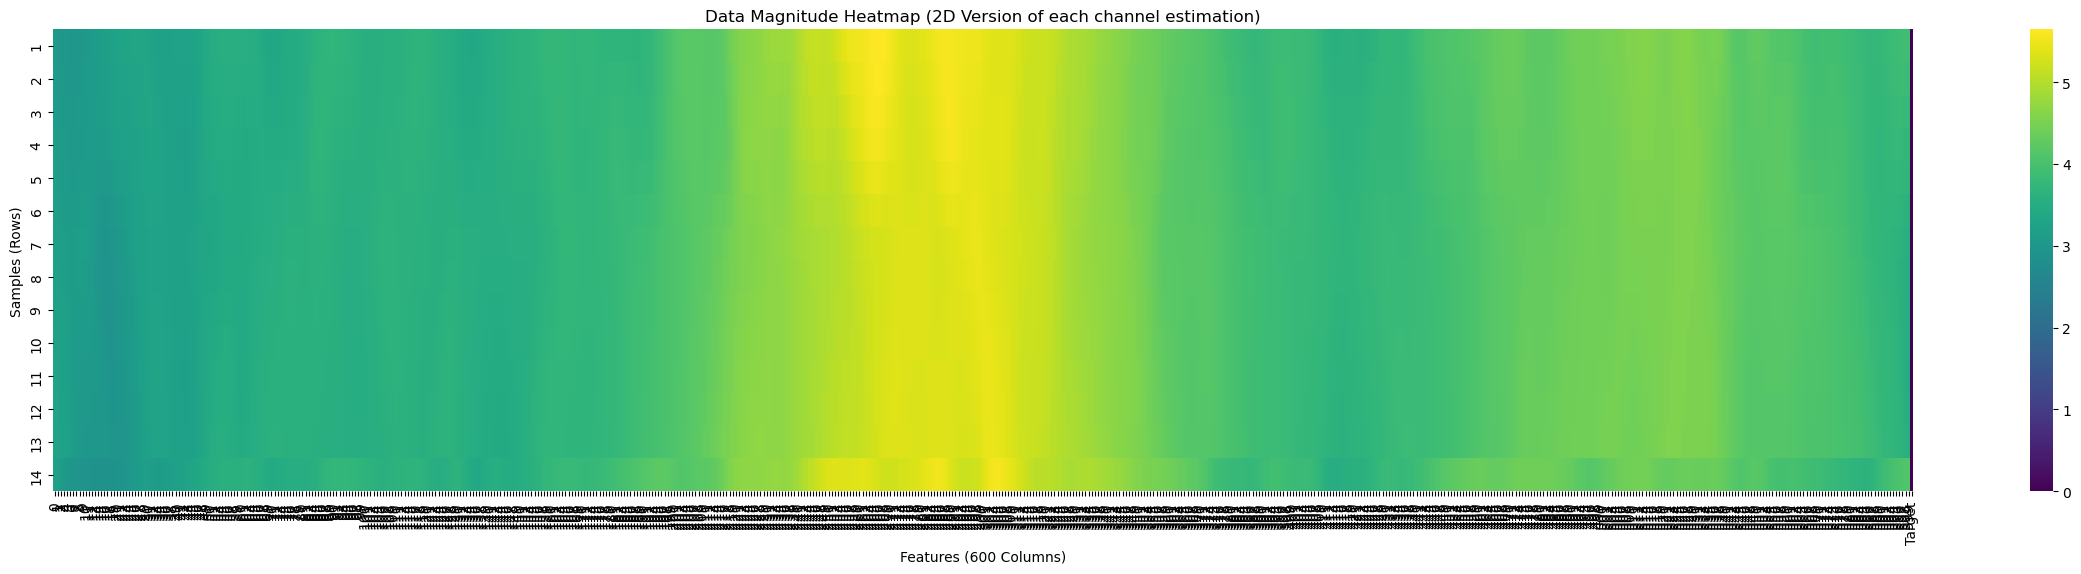

In [25]:
# Set up the figure
plt.figure(figsize=(30, 6))  # Adjust the figure size as needed
comp_abs_data = np.abs(complete_data)

sub_set = comp_abs_data.iloc[1:15,:]
# Create the heatmap
sns.heatmap(sub_set, cmap='viridis', xticklabels=True, yticklabels=True, cbar=True)

# Labels and title
plt.xlabel("Features (600 Columns)")
plt.ylabel("Samples (Rows)")
plt.title("Data Magnitude Heatmap (2D Version of each channel estimation)")

# Show the plot
plt.show()

# Splits the training set into dataset_0 and dataset_1
### dataset_0 contains all the 0 labelled data
### dataset_1 contains all the 1 labelled data


In [26]:
dataset_0 = train_data[train_data['Target'] == 0]
dataset_1 = train_data[train_data['Target'] == 1]

labels_0 = dataset_0.pop('Target')
labels_1 = dataset_1.pop('Target')

dataset_0=np.abs(dataset_0)
dataset_1=np.abs(dataset_1)

## Conform the Data
- Pops the training and data variables
- Takes absolute of the data
- Normalizes the data
- Collects data stats (Min, max, std dev, etc...)
- Displays Stats

In [27]:

def normalize(x):
    return (x-stats['min'])/ (stats['max'] - stats['min'])

Targets = train_data.pop('Target')

data_var = np.abs(complete_data)
# data_var = complete_data

data_var.pop('Target')
# data_var = norm_data
stats = data_var.describe().transpose()

# data_var = normalize(data_var)

data_var

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,3.021548,2.998689,2.978652,2.963953,2.957063,2.958591,2.966440,2.979017,2.994750,3.012074,...,3.793814,3.807890,3.823351,3.843997,3.871344,3.900992,3.928555,3.949643,3.959886,3.958128
1,3.046537,3.023084,3.002284,2.986862,2.978187,2.976186,2.981579,2.991937,3.005427,3.020116,...,3.766842,3.778948,3.797466,3.819097,3.843221,3.869541,3.893439,3.909295,3.910652,3.904151
2,3.071358,3.049250,3.028973,3.013949,3.003171,2.997099,2.998648,3.006387,3.017125,3.029157,...,3.738333,3.751521,3.774400,3.799044,3.819559,3.840740,3.858045,3.862777,3.856149,3.844947
3,3.092770,3.074476,3.056786,3.042272,3.030116,3.021362,3.017817,3.021868,3.029280,3.041841,...,3.714563,3.730386,3.753013,3.776697,3.796155,3.809513,3.816473,3.810994,3.799293,3.785020
4,3.112750,3.097485,3.082323,3.067478,3.054400,3.044419,3.038738,3.038470,3.043992,3.053661,...,3.699283,3.712427,3.731158,3.750791,3.766655,3.774094,3.771314,3.761344,3.746774,3.730130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,3.329308,3.268350,3.208587,3.154138,3.107811,3.067188,3.034179,3.005060,2.977275,2.946198,...,4.084366,4.102683,4.120839,4.139112,4.155517,4.171633,4.189210,4.212089,4.239060,4.266597
4280,3.346786,3.290324,3.233696,3.183662,3.137343,3.093715,3.053948,3.020366,2.985176,2.950390,...,4.079767,4.095215,4.112732,4.132352,4.152886,4.172189,4.194968,4.223319,4.254294,4.285760
4281,3.364826,3.311237,3.259786,3.210330,3.162887,3.117547,3.074451,3.033773,2.994662,2.957505,...,4.075985,4.089998,4.107138,4.126869,4.148740,4.172380,4.199704,4.231383,4.265403,4.299930
4282,3.383245,3.332785,3.283976,3.235179,3.187038,3.140458,3.094182,3.046566,3.000766,2.959717,...,4.075369,4.087094,4.102665,4.121399,4.144228,4.168126,4.190343,4.218722,4.254362,4.292495


# Performs PCA using the inbuilt python PCA method

#### Generates the PCA dataframe

In [28]:
num_components = 20
pca = PCA(n_components=num_components)

principalComponents = pca.fit_transform(data_var)

arr = [str(i) for i in range(4, num_components+1)]
labels = ['principal component 1', 'principal component 2','principal component 3']

labels = labels + arr

principalDf = pd.DataFrame(data = principalComponents
             , columns = labels)

finalDf = pd.concat([principalDf, lab], axis = 1)

finalDf



,principal component 1,principal component 2,principal component 3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,Target
0,11.823248,6.878761,-2.902040,0.948990,3.131296,-0.527184,0.709485,-0.710097,0.436011,-0.606388,...,0.352216,-0.137662,-0.290177,-0.131459,-0.511651,0.593125,-0.493010,0.109689,-0.028469,Without Object
1,11.694066,6.831428,-2.867674,0.923144,3.003790,-0.389529,0.684877,-0.643438,0.502071,-0.552200,...,0.265501,-0.056675,-0.348080,-0.161298,-0.465714,0.519565,-0.430303,0.097361,-0.107130,Without Object
2,11.571338,6.777979,-2.834890,0.895007,2.870250,-0.243251,0.647464,-0.570846,0.562473,-0.489797,...,0.172131,0.028186,-0.405751,-0.181400,-0.396987,0.435948,-0.352140,0.078154,-0.187722,Without Object
3,11.445024,6.721345,-2.801973,0.865930,2.732342,-0.085127,0.593773,-0.489671,0.613085,-0.413978,...,0.072955,0.116260,-0.450825,-0.190590,-0.314196,0.344269,-0.260662,0.057972,-0.260329,Without Object
4,11.310578,6.663200,-2.768023,0.838727,2.593749,0.081065,0.527825,-0.405286,0.650832,-0.330016,...,-0.030580,0.206437,-0.474474,-0.194332,-0.235954,0.251445,-0.166185,0.040988,-0.317391,Without Object
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,-9.288262,1.753367,0.886648,0.924382,-1.994663,0.108008,-0.121590,-0.662844,0.219180,-0.455290,...,-0.026282,-0.256121,0.007699,0.049915,0.041227,0.319745,-0.108407,-0.815002,-0.245723,With Object
4280,-9.317056,1.734859,0.859585,0.914053,-1.987491,0.119485,-0.188701,-0.708378,0.284477,-0.411174,...,0.012452,-0.214703,0.001055,0.038671,0.074825,0.346820,-0.121347,-0.842510,-0.266960,With Object
4281,-9.398574,1.728807,0.850825,0.911216,-1.982285,0.121688,-0.248411,-0.749886,0.360202,-0.366924,...,0.043825,-0.176159,-0.003373,0.027042,0.106807,0.371639,-0.132073,-0.871003,-0.286247,With Object
4282,-9.701958,1.788187,0.909778,0.923268,-1.986685,0.124967,-0.302062,-0.828746,0.438411,-0.306576,...,0.053480,-0.137783,0.002884,0.008573,0.150247,0.404436,-0.122201,-0.904338,-0.302855,With Object


#### Plots the variance of each of the components

In [29]:
# Get explained variance ratio (percentage contribution of each component)
explained_variance = pca.explained_variance_ratio_ * 100

# Display the explained variance of each component
explained_variance_df = pd.DataFrame({
    'Principal Component': labels[:len(explained_variance)],
    'Explained Variance Ratio': explained_variance
})

# Print explained variance contribution
print("\nExplained Variance Ratio for Each Principal Component:")
sol = round(explained_variance_df,4)
sol


Explained Variance Ratio for Each Principal Component:


,Principal Component,Explained Variance Ratio
0,principal component 1,70.1753
1,principal component 2,17.5748
2,principal component 3,5.3037
3,4,1.8828
4,5,0.8819
5,6,0.5489
6,7,0.3723
7,8,0.3350
8,9,0.2573
9,10,0.2301


#### Displays the Results of the PCA using a 3D Plot (3 components)

In [30]:

import plotly.graph_objects as go

# Create the figure
fig = go.Figure()

# For each target class, add a scatter3d trace
for target in finalDf['Target'].unique():
    mask = finalDf['Target'] == target
    fig.add_trace(
        go.Scatter3d(
            x=finalDf.loc[mask, 'principal component 1'],
            y=finalDf.loc[mask, 'principal component 2'],
            z=finalDf.loc[mask, 'principal component 3'],
            mode='markers',
            marker=dict(size=5),
            name=str(target)
        )
    )

# Set axis titles and layout
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='principal component 3'
    ),
    legend_title_text='Target'
)

fig.show()


### Alternate 3D display of PCA results

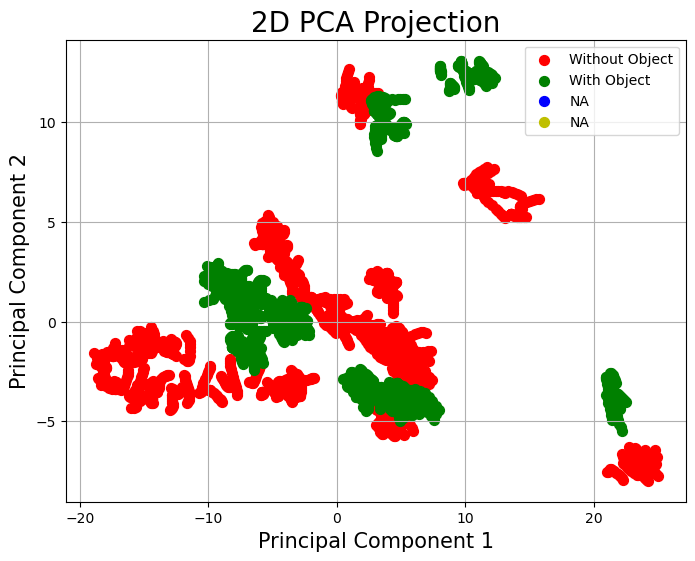

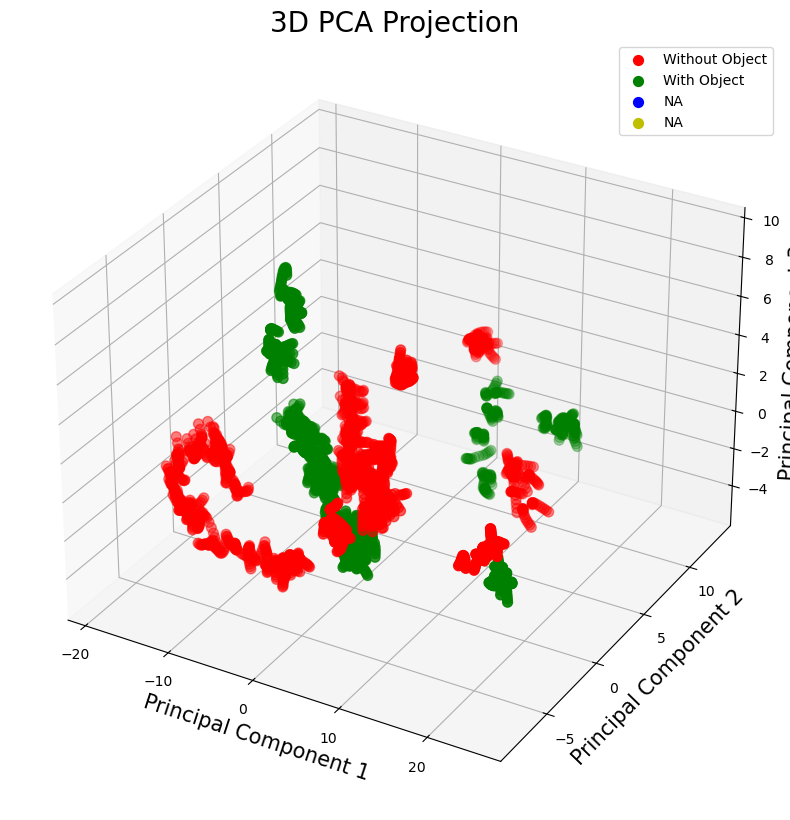

In [31]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.ion()

# Create a figure and a 3D subplot
plt.ion()

# Create a figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA Projection', fontsize=20)

# Define target classes and their corresponding colors
targets = [target1, target2, target3, target4]
colors = ['r', 'g', 'b', 'y']

# Scatter plot for each target class
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=target)

# Add legend and grid
ax.legend()
ax.grid()

# Show plot
plt.show(block=True)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_zlabel('Principal Component 3', fontsize=15)
ax.set_title('3D PCA Projection', fontsize=20)

# Define target classes and their corresponding colors
targets = [target1, target2, target3, target4]
colors = ['r', 'g', 'b', 'y']

# Scatter plot for each target class
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c=color,
               s=50)

# Add legend and grid
ax.legend(targets)
ax.grid()

# Show plot
plt.show(block=True)


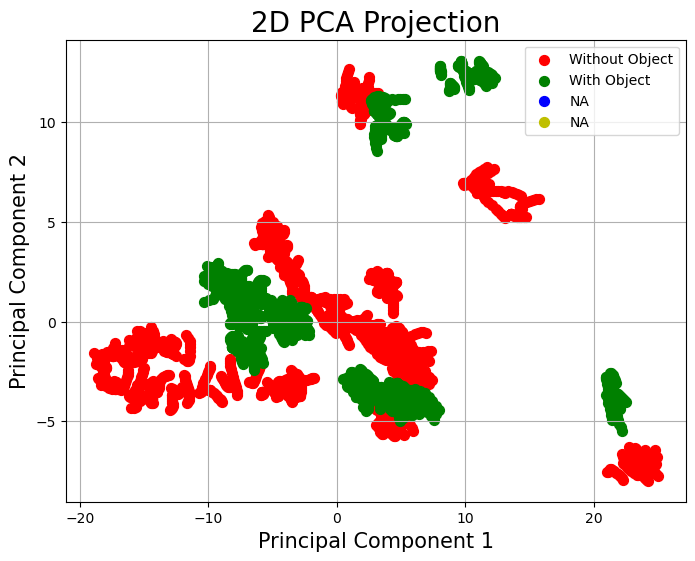

In [32]:
import matplotlib.pyplot as plt

plt.ion()

# Create a figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Set labels and title
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2D PCA Projection', fontsize=20)

# Define target classes and their corresponding colors
targets = [target1, target2, target3, target4]
colors = ['r', 'g', 'b', 'y']

# Scatter plot for each target class
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               s=50,
               label=target)

# Add legend and grid
ax.legend()
ax.grid()

# Show plot
plt.show(block=True)


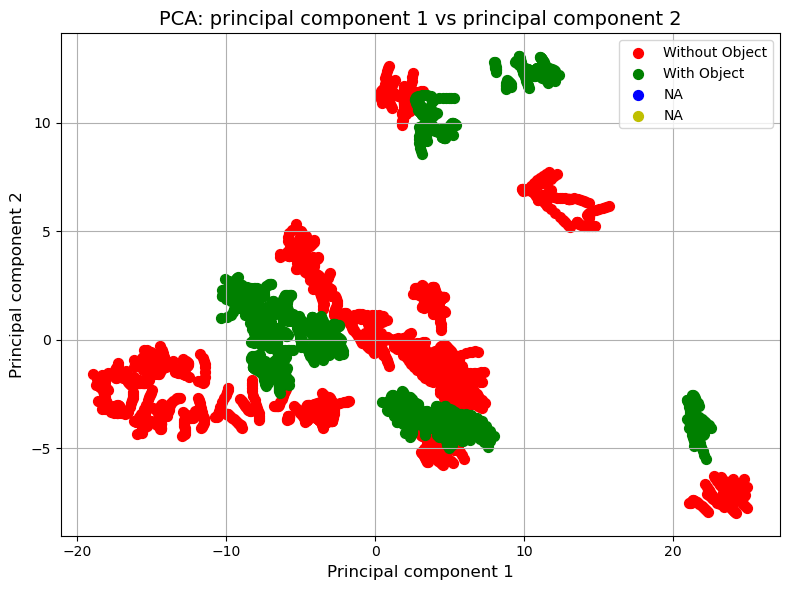

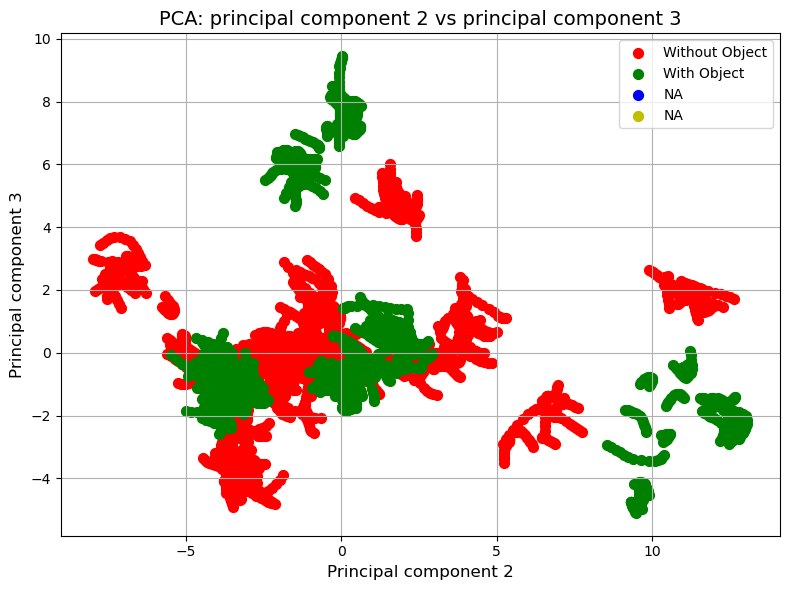

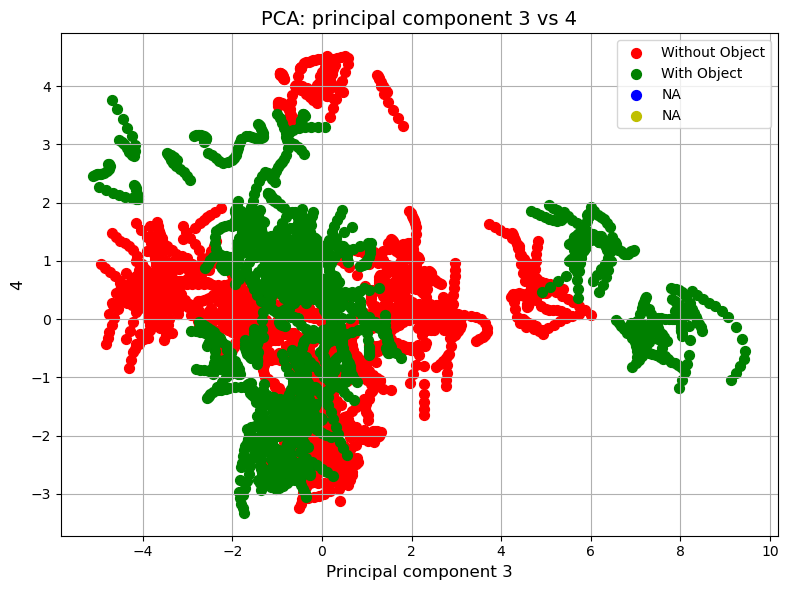

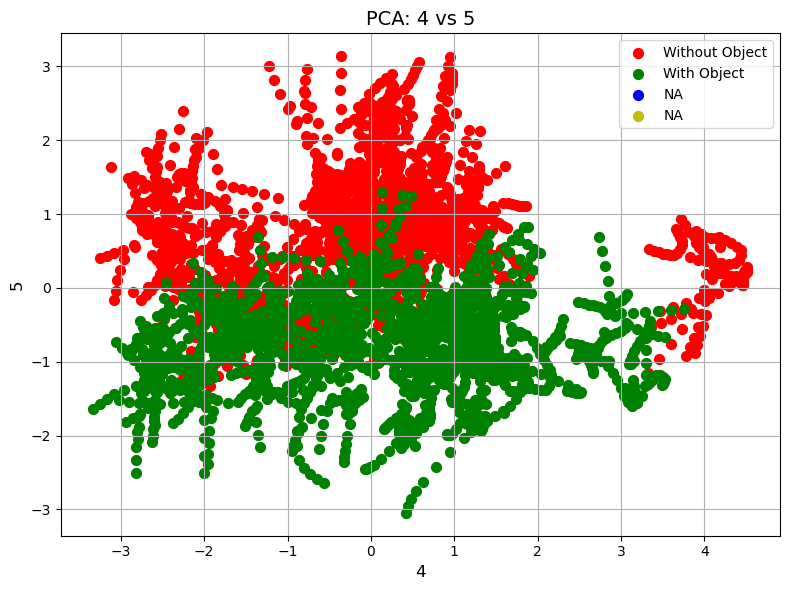

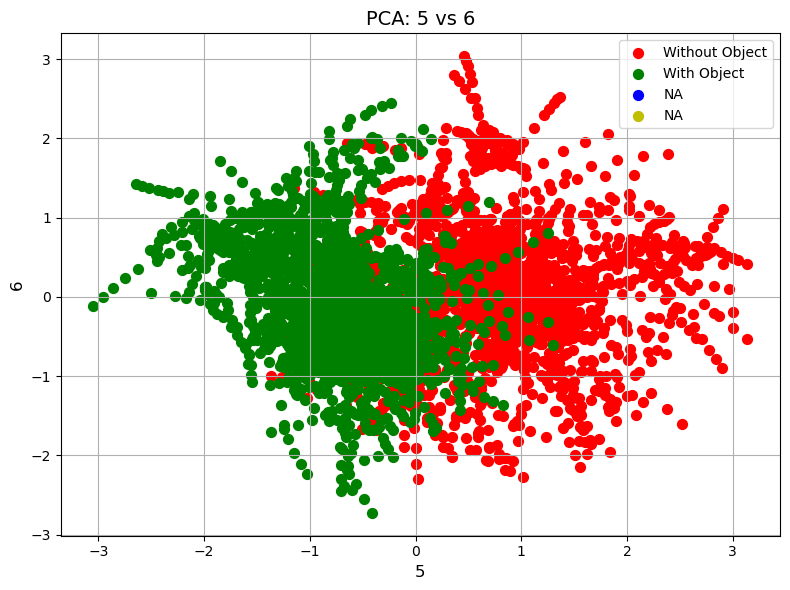

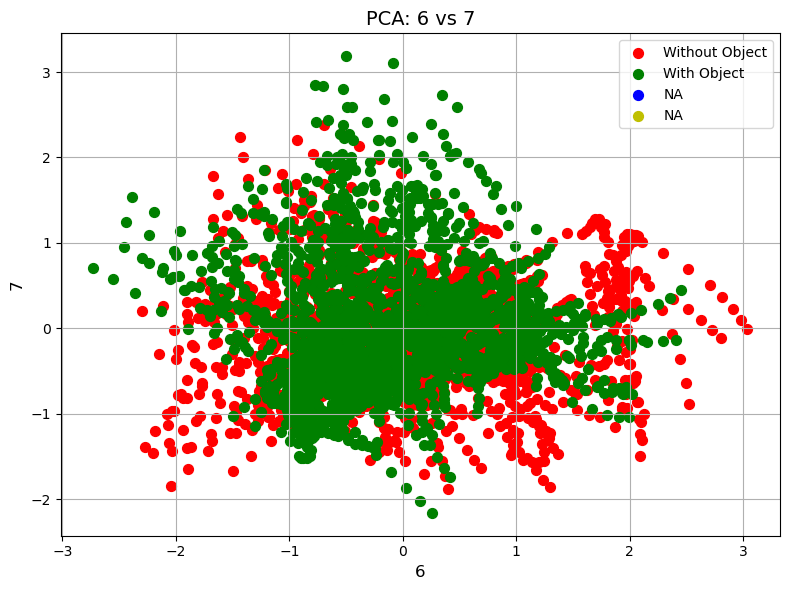

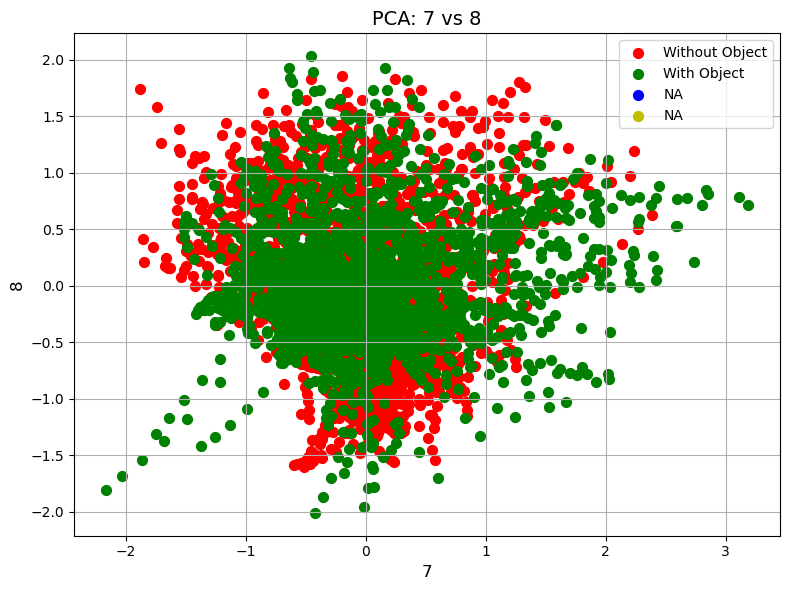

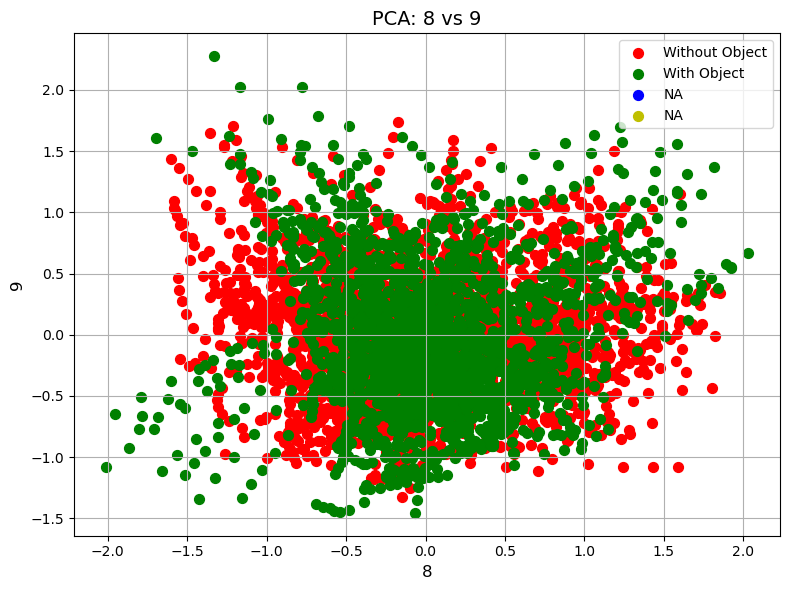

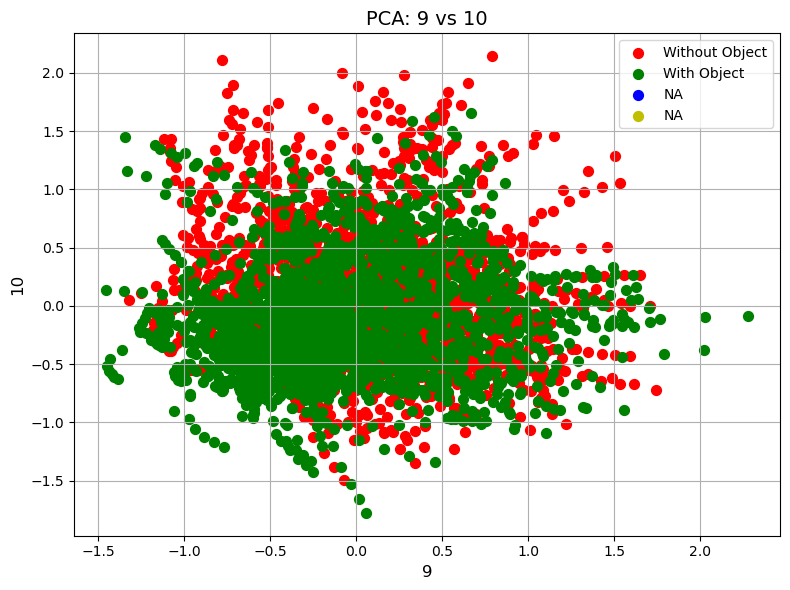

In [33]:
for i in range(1, 10):
    if i <= 3:
        x_col = f'principal component {i}'
    else:
        x_col = str(i)
    
    if i + 1 <= 3:
        y_col = f'principal component {i + 1}'
    else:
        y_col = str(i + 1)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    ax.set_xlabel(x_col.capitalize(), fontsize=12)
    ax.set_ylabel(y_col.capitalize(), fontsize=12)
    ax.set_title(f'PCA: {x_col} vs {y_col}', fontsize=14)

    for target, color in zip(targets, colors):
        mask = finalDf['Target'] == target
        ax.scatter(finalDf.loc[mask, x_col],
                   finalDf.loc[mask, y_col],
                   c=color,
                   s=50,
                   label=target)

    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show(block=True)


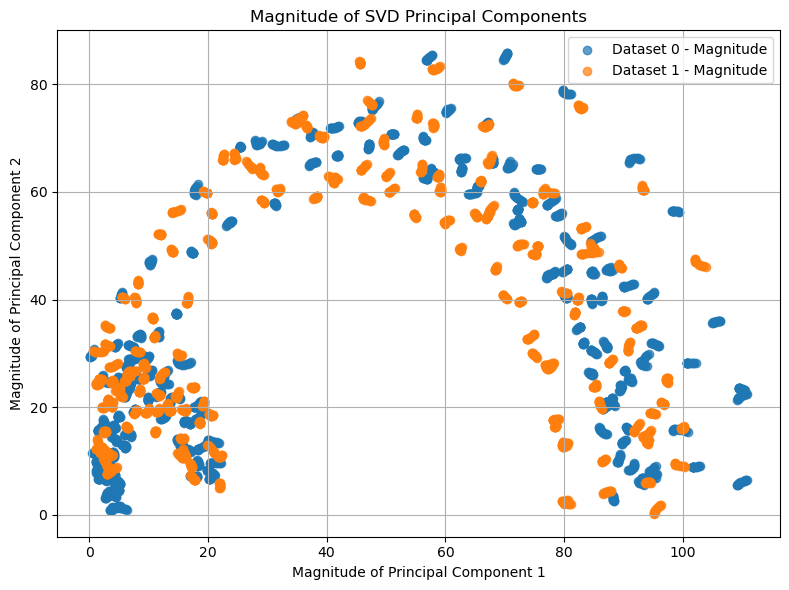

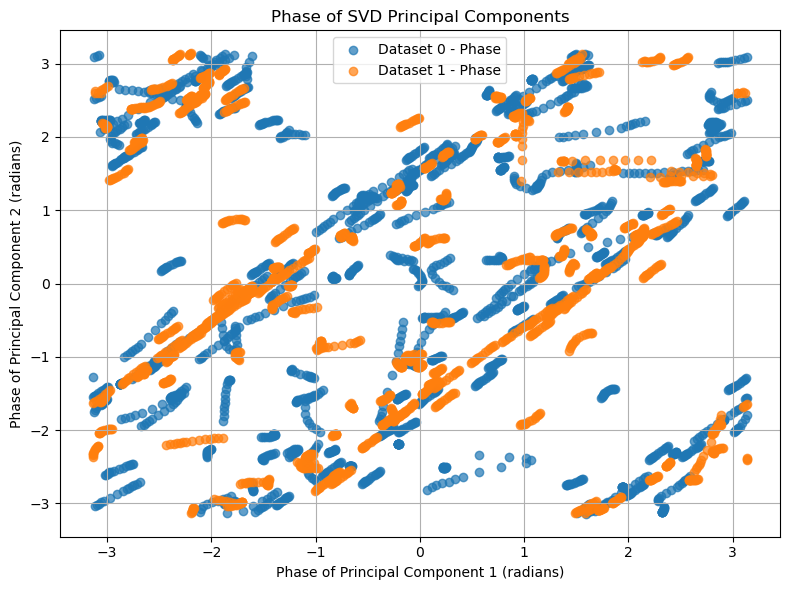

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd


dataset_no = complete_data[complete_data['Target'] == 0]
dataset_yes = complete_data[complete_data['Target'] == 1]

labels_no = dataset_no.pop('Target')
labels_yes = dataset_yes.pop('Target')

# Step 1: Combine the datasets
combined_data = np.vstack([dataset_no, dataset_yes])
# combined_data = np.vstack([dataset_2])

# Step 2: Center the combined data
mean_vector = np.mean(combined_data, axis=0)
combined_centered = combined_data - mean_vector

# Step 3: Perform SVD
U, S, Vt = svd(combined_centered, full_matrices=False)

# Step 4: Project onto principal components (scores)
principal_components = U @ np.diag(S)  # Equivalent to combined_centered @ Vt.T

# Step 5: Split the principal components back
n0 = len(dataset_no)
principal_components_0 = principal_components[:n0, :]
principal_components_1 = principal_components[n0:, :]

# Step 6: Keep only the first k components
k = 2
pc0 = principal_components_0[:, :k]
pc1 = principal_components_1[:, :k]

# Step 7: Make DataFrames for plotting
# df0 = pd.DataFrame(pc0, columns=[f"PC{i+1}" for i in range(k)])
# df1 = pd.DataFrame(pc1, columns=[f"PC{i+1}" for i in range(k)])
# Option 1: Use real parts
# df0 = pd.DataFrame(pc0.real, columns=[f"PC{i+1}" for i in range(k)])
# df1 = pd.DataFrame(pc1.real, columns=[f"PC{i+1}" for i in range(k)])


# Step 7: Create DataFrames for magnitude and phase
df0_mag = pd.DataFrame(np.abs(pc0), columns=[f"Mag_PC{i+1}" for i in range(k)])
df0_phase = pd.DataFrame(np.angle(pc0), columns=[f"Phase_PC{i+1}" for i in range(k)])

df1_mag = pd.DataFrame(np.abs(pc1), columns=[f"Mag_PC{i+1}" for i in range(k)])
df1_phase = pd.DataFrame(np.angle(pc1), columns=[f"Phase_PC{i+1}" for i in range(k)])



# Step 8: Plot magnitude
plt.figure(figsize=(8, 6))
plt.scatter(df0_mag["Mag_PC1"], df0_mag["Mag_PC2"], label="Dataset 0 - Magnitude", alpha=0.7)
plt.scatter(df1_mag["Mag_PC1"], df1_mag["Mag_PC2"], label="Dataset 1 - Magnitude", alpha=0.7)
plt.xlabel("Magnitude of Principal Component 1")
plt.ylabel("Magnitude of Principal Component 2")
plt.title("Magnitude of SVD Principal Components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Plot phase
plt.figure(figsize=(8, 6))
plt.scatter(df0_phase["Phase_PC1"], df0_phase["Phase_PC2"], label="Dataset 0 - Phase", alpha=0.7)
plt.scatter(df1_phase["Phase_PC1"], df1_phase["Phase_PC2"], label="Dataset 1 - Phase", alpha=0.7)
plt.xlabel("Phase of Principal Component 1 (radians)")
plt.ylabel("Phase of Principal Component 2 (radians)")
plt.title("Phase of SVD Principal Components")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


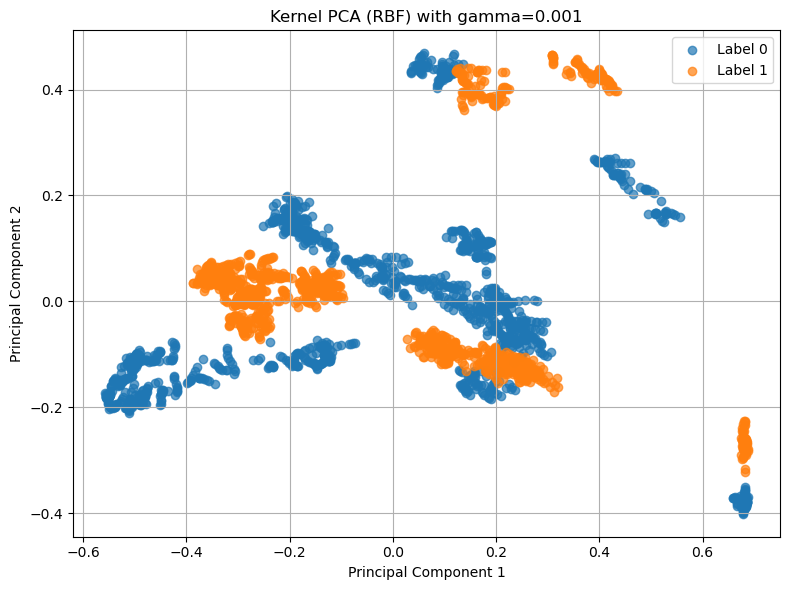

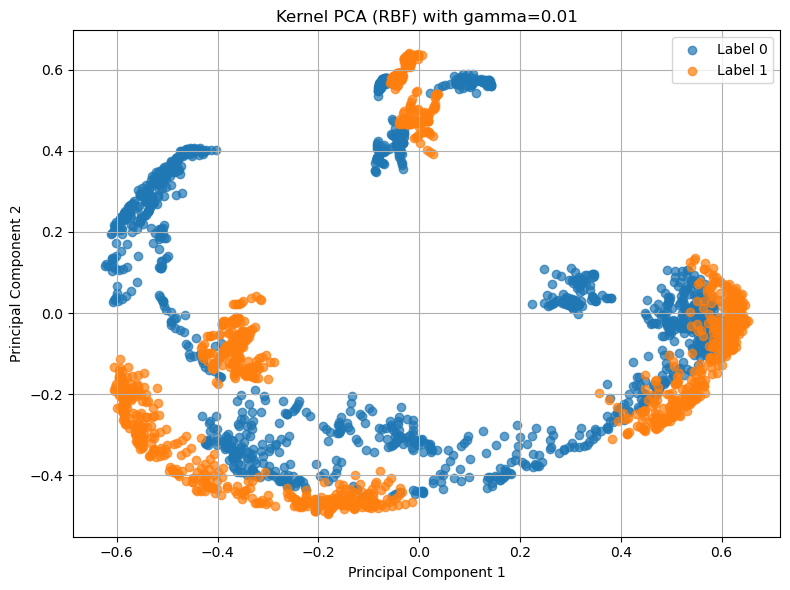

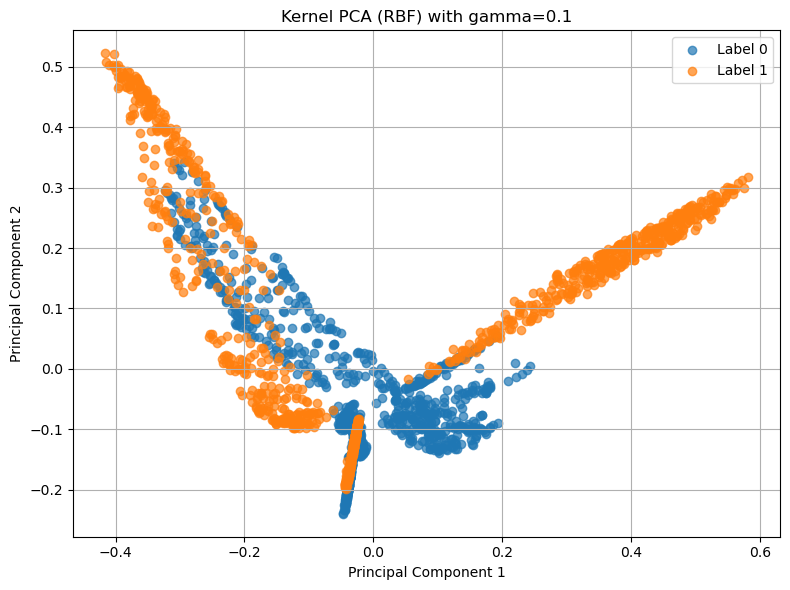

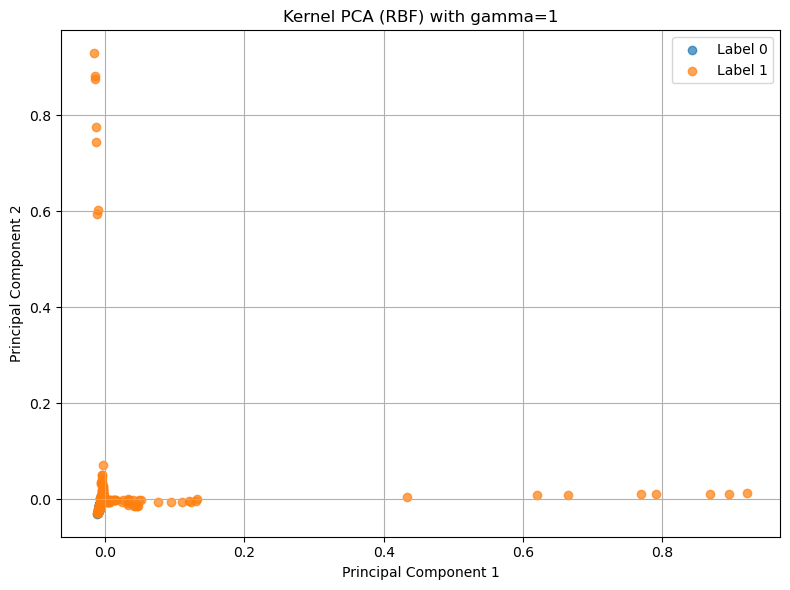

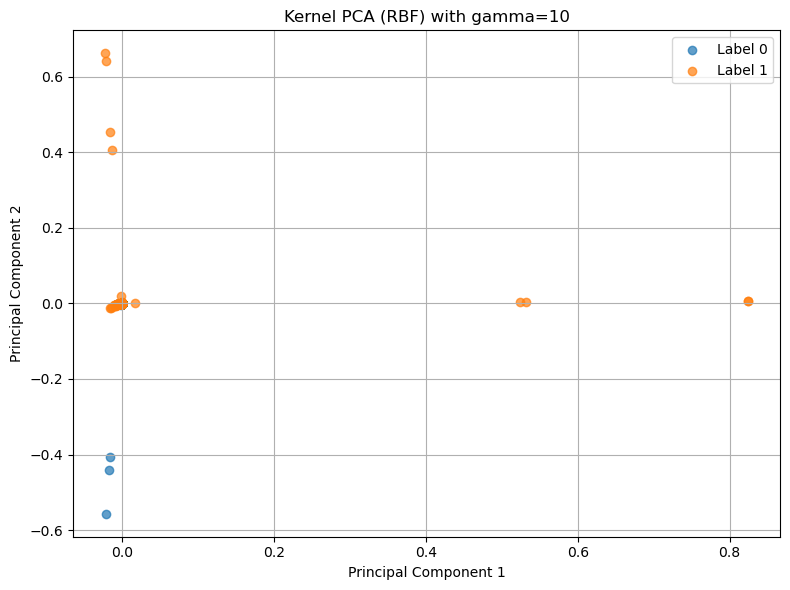

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# Combine the datasets
combined_dataset = np.vstack([dataset_0, dataset_1])

# List of gamma values to try
gamma_values = [0.001, 0.01, 0.1, 1, 10]

for gamma in gamma_values:
    # Apply RBF Kernel PCA with specified gamma
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    principal_components = kpca.fit_transform(combined_dataset)

    # Split the transformed data
    pca_label_0 = pd.DataFrame(data=principal_components[:len(dataset_0)], columns=['PC1', 'PC2'])
    pca_label_1 = pd.DataFrame(data=principal_components[len(dataset_0):], columns=['PC1', 'PC2'])

    # Plot
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_label_0['PC1'], pca_label_0['PC2'], label='Label 0', alpha=0.7)
    plt.scatter(pca_label_1['PC1'], pca_label_1['PC2'], label='Label 1', alpha=0.7)
    plt.title(f'Kernel PCA (RBF) with gamma={gamma}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()




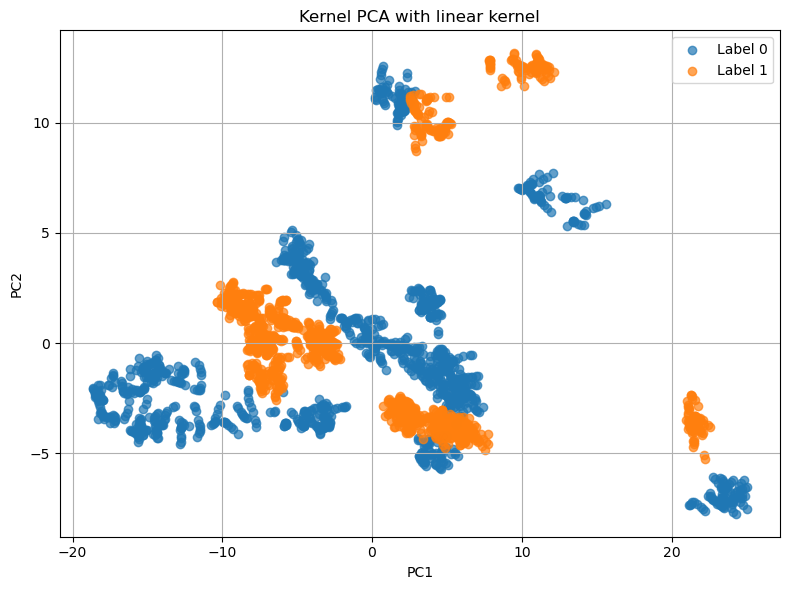

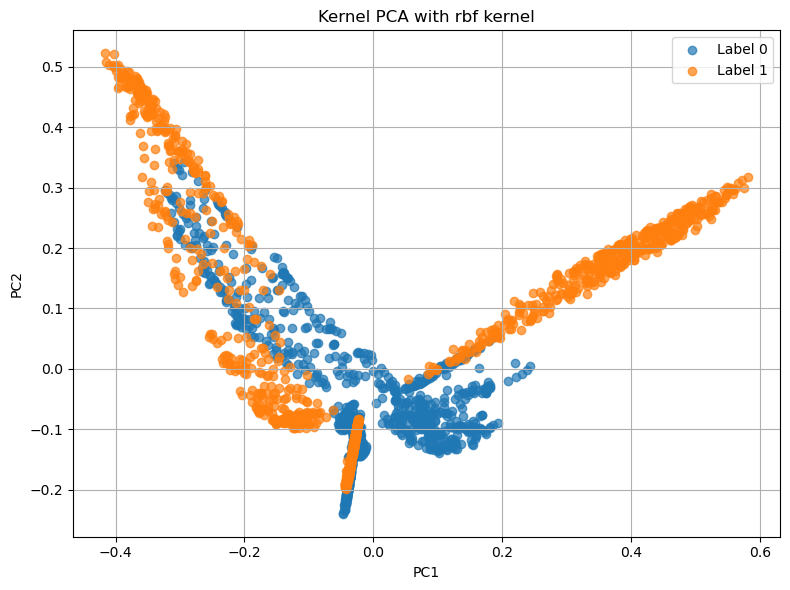

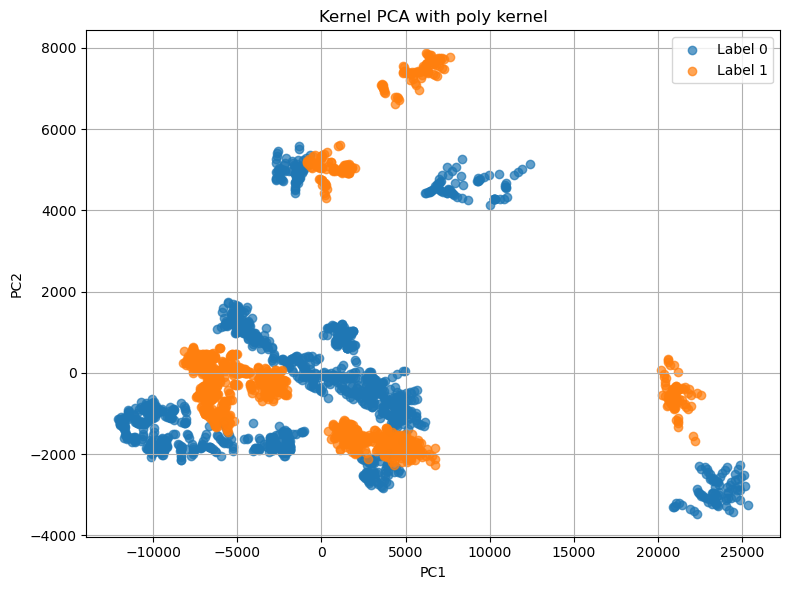

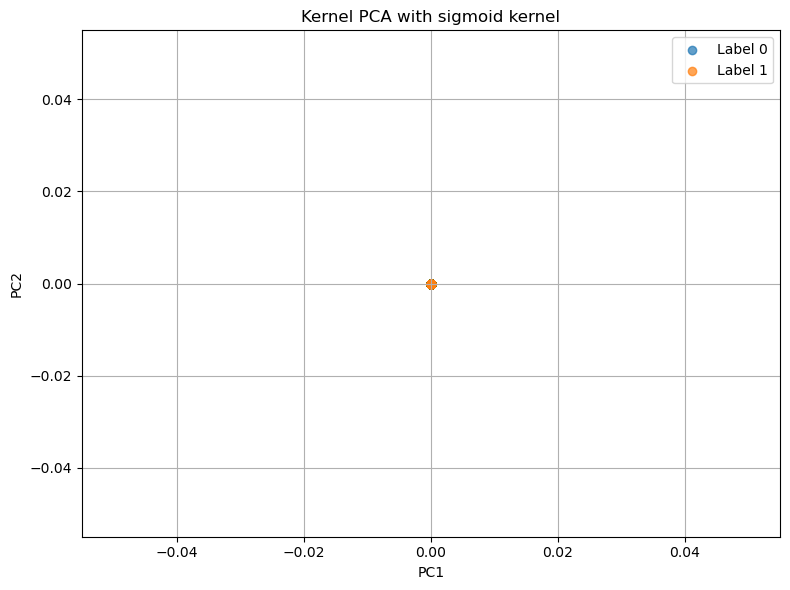

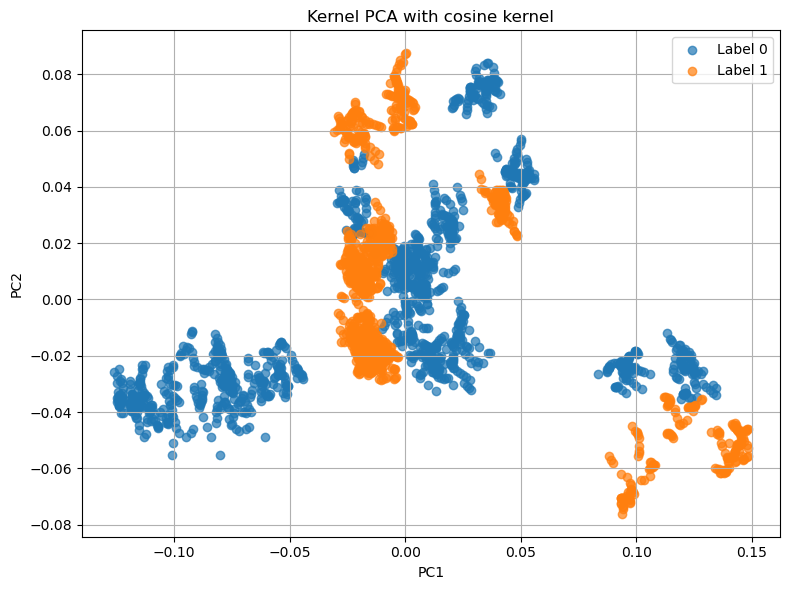

In [36]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid', 'cosine']

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=0.1)  # gamma only used for some kernels
    pcs = kpca.fit_transform(combined_dataset)

    df0 = pd.DataFrame(pcs[:len(dataset_0)], columns=['PC1', 'PC2'])
    df1 = pd.DataFrame(pcs[len(dataset_0):], columns=['PC1', 'PC2'])

    plt.figure(figsize=(8, 6))
    plt.scatter(df0['PC1'], df0['PC2'], label='Label 0', alpha=0.7)
    plt.scatter(df1['PC1'], df1['PC2'], label='Label 1', alpha=0.7)
    plt.title(f'Kernel PCA with {kernel} kernel')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
